In [6]:
# Import all necessary library
import pandas as pd 
import numpy as np

# visualization library
import matplotlib.pyplot as plt

In [7]:
# Loading the dataset

df = pd.read_csv(r'E:\Hochschule Ansbach\Thesis\DATA\df_LeadTime.csv')

In [8]:
# printing 1st 5 rows
df.head()

,Actual shipping days,Estimated shipping days,Late_risk,Order Item Product Price,Quantity,Sales,Order Item Total,Product Price,Department,Shipping Mode,Orders Date_datetype,Shipping date_datetype,Customer Segment cat,Category_map,Order Region_map,Delivery Status_code
0,3,4,0,327.75,1,327.75,314.640015,327.75,Fitness,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,0,357,9539,1
1,5,4,1,327.75,1,327.75,311.359985,327.75,Fitness,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,0,357,7731,1
2,4,4,0,327.75,1,327.75,309.720001,327.75,Fitness,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,0,357,7731,1
3,3,4,0,327.75,1,327.75,304.809998,327.75,Fitness,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,2,357,10148,1
4,2,4,0,327.75,1,327.75,298.250000,327.75,Fitness,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,1,357,10148,1


# EDA

In [9]:
# describe method for numeric columns
df.describe()

,Actual shipping days,Estimated shipping days,Late_risk,Order Item Product Price,Quantity,Sales,Order Item Total,Product Price,Customer Segment cat,Category_map,Order Region_map,Delivery Status_code
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,0.548291,141.232550,2.127638,203.772096,183.107609,141.232550,0.660545,16311.775331,14231.371119,0.957046
std,1.623722,1.374449,0.497664,139.732492,1.453451,132.273077,120.043670,139.732492,0.762408,7112.004248,9431.443100,0.202754
min,0.000000,0.000000,0.000000,9.990000,1.000000,9.990000,7.490000,9.990000,0.000000,61.000000,553.000000,0.000000
25%,2.000000,2.000000,0.000000,50.000000,1.000000,119.980003,104.379997,50.000000,0.000000,12487.000000,7280.000000,1.000000
50%,3.000000,4.000000,1.000000,59.990002,1.000000,199.919998,163.990005,59.990002,0.000000,17325.000000,9792.000000,1.000000
75%,5.000000,4.000000,1.000000,199.990005,3.000000,299.950012,247.399994,199.990005,1.000000,22246.000000,27109.000000,1.000000
max,6.000000,4.000000,1.000000,1999.989990,5.000000,1999.989990,1939.989990,1999.989990,2.000000,24551.000000,28341.000000,1.000000


In [10]:
# describe for non numeric columns 
df.describe(exclude='number')

,Department,Shipping Mode,Orders Date_datetype,Shipping date_datetype
count,180519,180519,180519,180519
unique,11,4,65752,63701
top,Fan Shop,Standard Class,2017-09-28 22:56:00,2015-11-06 23:55:00
freq,66861,107752,5,10


In [11]:
# info method 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Actual shipping days      180519 non-null  int64  
 1   Estimated shipping days   180519 non-null  int64  
 2   Late_risk                 180519 non-null  int64  
 3   Order Item Product Price  180519 non-null  float64
 4   Quantity                  180519 non-null  int64  
 5   Sales                     180519 non-null  float64
 6   Order Item Total          180519 non-null  float64
 7   Product Price             180519 non-null  float64
 8   Department                180519 non-null  object 
 9   Shipping Mode             180519 non-null  object 
 10  Orders Date_datetype      180519 non-null  object 
 11  Shipping date_datetype    180519 non-null  object 
 12  Customer Segment cat      180519 non-null  int64  
 13  Category_map              180519 non-null  i

# Preprocessing 

In [12]:
# Dropping irrevant columns
df.drop(['Orders Date_datetype', 'Shipping date_datetype'], axis=1, inplace= True)

In [13]:
# finding specific values
# 2016-08-27 10:42:00
# https://stackoverflow.com/questions/53587315/pandas-find-specific-value-in-entire-dataframe
df[df.eq("2016-08-27 10:42:00").any(1)]

,Actual shipping days,Estimated shipping days,Late_risk,Order Item Product Price,Quantity,Sales,Order Item Total,Product Price,Department,Shipping Mode,Customer Segment cat,Category_map,Order Region_map,Delivery Status_code


# I will also drop the Estimated Shipping columns 

In [14]:
# printing 1st 5 rows
df.head(10)

,Actual shipping days,Estimated shipping days,Late_risk,Order Item Product Price,Quantity,Sales,Order Item Total,Product Price,Department,Shipping Mode,Customer Segment cat,Category_map,Order Region_map,Delivery Status_code
0,3,4,0,327.75,1,327.75,314.640015,327.75,Fitness,Standard Class,0,357,9539,1
1,5,4,1,327.75,1,327.75,311.359985,327.75,Fitness,Standard Class,0,357,7731,1
2,4,4,0,327.75,1,327.75,309.720001,327.75,Fitness,Standard Class,0,357,7731,1
3,3,4,0,327.75,1,327.75,304.809998,327.75,Fitness,Standard Class,2,357,10148,1
4,2,4,0,327.75,1,327.75,298.250000,327.75,Fitness,Standard Class,1,357,10148,1
5,6,4,0,327.75,1,327.75,294.980011,327.75,Fitness,Standard Class,0,357,10148,0
6,2,1,1,327.75,1,327.75,288.420013,327.75,Fitness,First Class,2,357,7280,1
7,2,1,1,327.75,1,327.75,285.140015,327.75,Fitness,First Class,1,357,7280,1
8,3,2,1,327.75,1,327.75,278.589996,327.75,Fitness,Second Class,1,357,7280,1
9,2,1,1,327.75,1,327.75,275.309998,327.75,Fitness,First Class,1,357,7280,1


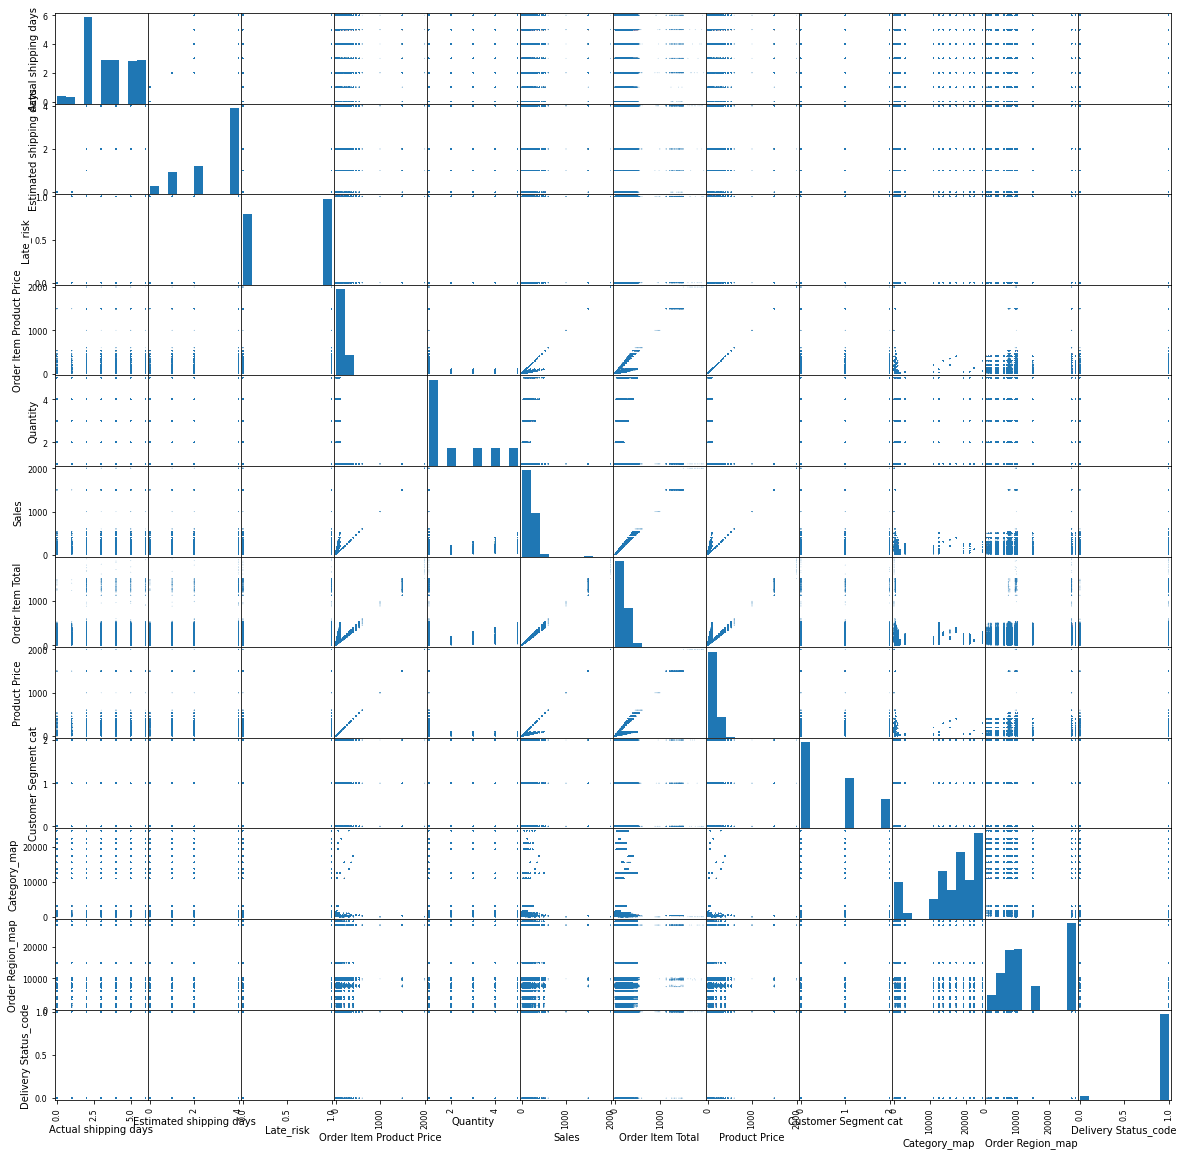

In [15]:
# Visual EDA
pd.plotting.scatter_matrix(df,  figsize = [20, 20],s=0.5, marker = 'D')

plt.xticks(rotation=90)
plt.show()

# Encoding dummy variables

# Sanity Check

In [16]:
# Have to count is it right or not cause i drop the 1st one so i have to do calculate the number or column ok or not 

In [17]:
# unique values in 'Department' column
df.Department.unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology', 'Book Shop', 'Discs Shop', 'Pet Shop',
       'Health and Beauty '], dtype=object)

In [18]:
# unique values in 'Shipping Mode' column
df['Shipping Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [19]:
# Counting how many unique values in these two  columns 

from collections import  Counter

d=Counter(df.Department.unique()) # this give us a dictonary .so  extract the values of dict nad make a sum.


print('Total unique values in "Department" : ', sum(d.values()))



e=Counter(df['Shipping Mode'].unique()) # this give us a dictonary .so  extract the values of dict nad make a sum.


print('Total unique values in "Shipping Mode": ',sum(e.values()))

# as we make dummy variable so we add 11+4= 15 columns ad we drop 1st to net 13 cloumns we  added

#print('\nOriginal df shape: ', df.shape)

#print('Dummy var df shape: ',df_dum.shape)
# get_dummy() also drop by default 'Department','Shipping Mode' columns which we made dummy variavle

Total unique values in "Department" :  11
Total unique values in "Shipping Mode":  4


In [20]:
# Checking data types
df.dtypes

Actual shipping days          int64
Estimated shipping days       int64
Late_risk                     int64
Order Item Product Price    float64
Quantity                      int64
Sales                       float64
Order Item Total            float64
Product Price               float64
Department                   object
Shipping Mode                object
Customer Segment cat          int64
Category_map                  int64
Order Region_map              int64
Delivery Status_code          int64
dtype: object

# Train/test split

In [21]:
# Import necessary Library

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
# For HyperParameter Tuning
from sklearn.model_selection import GridSearchCV

In [22]:
# "Actual shipping days" is target/Predic column/ variable here


# https://datascience.stackexchange.com/questions/70272/discrete-values-as-target-variable
# https://www.springboard.com/blog/data-science/regression-vs-classification/

 

print(df["Actual shipping days"].unique()) # it has 7 discreat valuues are that valeus are integer 

print(df["Actual shipping days"].dtypes)

# it is a regression problem

[3 5 4 2 6 0 1]
int64


In [23]:
# separating the feature variable
X=df.drop("Actual shipping days", axis=1)

# separating the target variable

y=df["Actual shipping days"]

In [24]:
# printing the dimension of feature space
print(X.shape)

# printing the dimension of target space
print(y.shape)

(180519, 13)
(180519,)


In [25]:
# Set seed for reproducibility

SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    
                                                    test_size=0.3,
                                                    
                                                    random_state=SEED)

In [26]:
# printing dimension

print(' X_train dimension : ', X_train.shape)
print('\n X_test dimension : ',X_test.shape )


print('\n y_train dimension : ',y_train.shape )
print(' \n y_test dimension : ',   y_test.shape)

 X_train dimension :  (126363, 13)

 X_test dimension :  (54156, 13)

 y_train dimension :  (126363,)
 
 y_test dimension :  (54156,)


In [27]:
# printing X_train
X_train

,Estimated shipping days,Late_risk,Order Item Product Price,Quantity,Sales,Order Item Total,Product Price,Department,Shipping Mode,Customer Segment cat,Category_map,Order Region_map,Delivery Status_code
174722,4,1,24.990000,4,99.959999,92.959999,24.990000,Fitness,Standard Class,0,343,28341,1
172881,2,0,129.990005,1,129.990005,122.839996,129.990005,Apparel,Second Class,0,22246,27109,1
93616,4,1,129.990005,1,129.990005,123.489998,129.990005,Apparel,Standard Class,0,22246,7731,1
165190,4,0,39.990002,5,199.949997,185.949997,39.990002,Golf,Standard Class,2,10984,959,1
168879,1,1,99.989998,5,499.950012,494.950012,99.989998,Footwear,First Class,2,12487,1677,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,1,1,199.990005,1,199.990005,169.990005,199.990005,Fan Shop,First Class,0,15540,3232,1
109259,4,0,59.990002,5,299.950012,269.959992,59.990002,Apparel,Standard Class,0,24551,28341,1
50057,2,0,59.990002,5,299.950012,290.950012,59.990002,Apparel,Second Class,1,24551,6915,1
5192,4,0,59.990002,3,179.970001,167.369995,59.990002,Apparel,Standard Class,1,24551,14935,1


In [28]:
# printing X_test
X_test

,Estimated shipping days,Late_risk,Order Item Product Price,Quantity,Sales,Order Item Total,Product Price,Department,Shipping Mode,Customer Segment cat,Category_map,Order Region_map,Delivery Status_code
101369,4,0,49.980000,4,199.919998,197.919998,49.980000,Fan Shop,Standard Class,0,19298,4045,1
3026,4,1,164.380005,1,164.380005,164.380005,164.380005,Discs Shop,Standard Class,2,483,27109,1
57549,4,1,59.990002,4,239.960007,226.759994,59.990002,Apparel,Standard Class,0,24551,6009,1
127144,4,1,129.990005,1,129.990005,103.989998,129.990005,Apparel,Standard Class,0,22246,14935,1
160375,4,0,39.750000,1,39.750000,37.560001,39.750000,Discs Shop,Standard Class,0,838,7280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151386,4,0,399.980011,1,399.980011,379.980011,399.980011,Fan Shop,Standard Class,1,17325,6915,1
9189,4,0,59.990002,5,299.950012,278.950012,59.990002,Apparel,Standard Class,0,24551,9539,1
83970,4,0,59.990002,1,59.990002,47.990002,59.990002,Apparel,Standard Class,0,24551,8318,1
122909,2,1,99.989998,3,299.970001,269.970001,99.989998,Footwear,Second Class,1,12487,27109,1


# One Hot Encoding 

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
# drop 1st dummy variable to avoid dummny variable trap

ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32) # then u do not need to use 'to_array()'

X_train_new= ohe.fit_transform(X_train[['Shipping Mode','Department']])

X_test_new= ohe.fit_transform(X_test[['Shipping Mode','Department']])

In [31]:
# have a look on X_train_new
X_train_new

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [32]:
# have a look on X_train_new
X_test_new

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [33]:
# dimension of X_train_new and X_test_new
print(' X_train_new dimension : ', X_train_new.shape)
print('\n X_test_new dimension : ',X_test_new.shape )

 X_train_new dimension :  (126363, 13)

 X_test_new dimension :  (54156, 13)


# Joining 

In [34]:
X_train.columns

Index(['Estimated shipping days', 'Late_risk', 'Order Item Product Price',
       'Quantity', 'Sales', 'Order Item Total', 'Product Price', 'Department',
       'Shipping Mode', 'Customer Segment cat', 'Category_map',
       'Order Region_map', 'Delivery Status_code'],
      dtype='object')

In [35]:
# join with others columns and One hot encoded columns
X_train=np.hstack((X_train[['Estimated shipping days', 'Late_risk', 'Order Item Product Price',
       'Quantity', 'Sales', 'Order Item Total', 'Product Price', 
        'Customer Segment cat', 'Category_map',
       'Order Region_map', 'Delivery Status_code']].values,X_train_new))

In [36]:
# Dimension of  X_train after joining 
X_train.shape

(126363, 24)

In [37]:
# join with others columns and One hot encoded columns
X_test=np.hstack((X_test[['Estimated shipping days', 'Late_risk', 'Order Item Product Price',
       'Quantity', 'Sales', 'Order Item Total', 'Product Price', 
        'Customer Segment cat', 'Category_map',
       'Order Region_map', 'Delivery Status_code']].values,X_test_new))

In [38]:
# Dimension of  X_test after joining 
X_test.shape

(54156, 24)

# Building Model 

### Model 1

In [39]:
# Set seed for reproducibility

SEED = 2
# Instantiate a random forests regressor with vanilla setting
rf = RandomForestRegressor( random_state=SEED,oob_score=True)

In [40]:
# train model 
model_1=rf.fit(X_train,y_train)

In [41]:
# Model Prediction
y_pred = model_1.predict(X_test)

# Model(vanilla setting) Performance

In [42]:
# importing performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
# mean_absolute_error
## There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.5776932868203768


In [45]:
# There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.6598433143966977


In [46]:
# storing the r2 score in s 
r2 = r2_score(y_test,y_pred)
print(r2)

0.7499634062310001


In [47]:
# do direct function for RMSE so we use np.sqrt()
# when u have the outlier it is a better metrics 
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.8123074014169129


# Cross validation  score  on Train data (vanilla Model)

In [48]:
# CV score for MSE
MSE_CV = - cross_val_score(model_1, X_train, y_train, cv= 5, scoring='neg_mean_squared_error', n_jobs = -1)

In [50]:
# CV MSE
print('MSE_CV: {:.2f}'.format(MSE_CV.mean()))

MSE_CV: 0.66


In [51]:
# RMSE CV score 

RMSE_CV = - cross_val_score(model_1, X_train, y_train, cv= 5, scoring='neg_root_mean_squared_error', n_jobs = -1)
# CV RMSE
print('RMSE_CV: {:.2f}'.format(RMSE_CV.mean()))

RMSE_CV: 0.81


In [52]:
#  storing the R2( Coefficient of ditermination) score 


r2_CV =  cross_val_score(model_1, X_train, y_train, cv= 5, scoring='r2', n_jobs = -1)
# CV R2
print('r2_CV: {:.2f}'.format(r2_CV.mean()))

r2_CV: 0.75


# Cross validation score on Test data (vanilla Model)

In [53]:
# CV score for MSE
MSE_CV_T = - cross_val_score(model_1, X_test, y_test, cv= 5, scoring='neg_mean_squared_error', n_jobs = -1)

# CV MSE
print('MSE_CV_T: {:.2f}'.format(MSE_CV_T.mean()))

MSE_CV_T: 0.66


In [54]:
# RMSE CV score 

RMSE_CV_T= - cross_val_score(model_1, X_test, y_test, cv= 5, scoring='neg_root_mean_squared_error', n_jobs = -1)

# CV RMSE
print('RMSE_CV_T: {:.2f}'.format(RMSE_CV.mean()))

RMSE_CV_T: 0.81


In [55]:
#  storing the R2( Coefficient of ditermination) score 


r2_CV_T =  cross_val_score(model_1, X_test, y_test, cv= 5, scoring='r2', n_jobs = -1)

# CV R2
print('r2_CV_T: {:.2f}'.format(r2_CV_T.mean()))

r2_CV_T: 0.75


# Hyperparamter tuning via RandomSearchCV

In [64]:
# importing RandomizedSearchCV For HyperParameter Tuning
from sklearn.model_selection import RandomizedSearchCV

In [65]:
# Set seed for reproducibility
SEED_TTT=3
# Instantiate a random forests regressor 
rf_tune = RandomForestRegressor( random_state=SEED_TTT)

In [66]:
# Number of trees in random forest
n_estimators = [200, 300,400]

# Number of features to consider at every split
max_features = [0.2,0.6,0.8,1]

# Maximum number of levels in tree
max_depth = [2,8, None]

# Number of samples
max_samples = [0.5,0.6,0.75]

# minimum number of samples required to be at a leaf node.
min_samples_leaf=[0.10,0.15, 0.20]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]

# for one combination one model 
#  729 different random forest model train

In [67]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'min_samples_leaf':min_samples_leaf,
              'min_samples_split':min_samples_split
             }
print(param_grid)

{'n_estimators': [200, 300, 400], 'max_features': [0.2, 0.6, 0.8, 1], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.6, 0.75], 'min_samples_leaf': [0.1, 0.15, 0.2], 'min_samples_split': [2, 3, 5]}


In [68]:
# Set seed for reproducibility
SEED_T=1111
# Instantiate a random forests regressor 
rf_tune = RandomForestRegressor( random_state=SEED_T)

In [69]:
rf_R_grid = RandomizedSearchCV(estimator = rf_tune, 
                       param_distributions= param_grid, 
                       cv = 10, 
                       verbose=2, 
                       n_jobs = -1)

In [70]:
# for measuring the run time 
import time
# measure starting time 
start = time.time()

# train  GridSearchCV
model_2=rf_R_grid.fit(X_train,y_train)

# measure end time 
end = time.time()

# measure elapse time 
print(end - start)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
397.98886275291443


In [71]:
# Getting best model's Parameter 
model_2.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 0.1,
 'max_samples': 0.75,
 'max_features': 0.8,
 'max_depth': None}

In [75]:
# Best model score
model_2.best_score_

0.7053111135635426

# Work with best model from RandomCV

In [77]:
# Set seed for reproducibility

SEED_TT=2222

# Instantiate a random forests regressor 

rf_best_r_g = RandomForestRegressor( random_state=SEED_TT, oob_score=True, n_estimators= 300,
                                                                         min_samples_split= 2,
                                                                         min_samples_leaf = 0.1,
                                                                         max_samples = 0.75,
                                                                         max_features= 0.8,
                                                                         max_depth= None)
 

# Cross validation  score  on Train data (RandomCV Model)

In [78]:
# CV score for MSE
MSE_CV = - cross_val_score(rf_best_r_g, X_train, y_train, cv= 5, scoring='neg_mean_squared_error', n_jobs = -1)
# CV MSE
print('MSE_CV: {:.2f}'.format(MSE_CV.mean()))

MSE_CV: 0.77


In [84]:
# RMSE CV score 

RMSE_CV = - cross_val_score(rf_best_r_g, X_train, y_train, cv= 5, scoring='neg_root_mean_squared_error', n_jobs = -1)
# CV RMSE
print('RMSE_CV: {:.2f}'.format(RMSE_CV.mean()))

RMSE_CV: 0.88


In [85]:
#  storing the R2( Coefficient of ditermination) score 


r2_CV =  cross_val_score(rf_best_r_g, X_train, y_train, cv= 5, scoring='r2', n_jobs = -1)
# CV R2
print('r2_CV: {:.2f}'.format(r2_CV.mean()))

r2_CV: 0.71


# Cross validation score on Test data ((RandomCV Model))

In [86]:
# CV score for MSE
MSE_CV_T = - cross_val_score(rf_best_r_g, X_test, y_test, cv= 5, scoring='neg_mean_squared_error', n_jobs = -1)

# CV MSE
print('MSE_CV_T: {:.2f}'.format(MSE_CV_T.mean()))

MSE_CV_T: 0.77


In [87]:
# RMSE CV score 

RMSE_CV_T= - cross_val_score(rf_best_r_g, X_test, y_test, cv= 5, scoring='neg_root_mean_squared_error', n_jobs = -1)

# CV RMSE
print('RMSE_CV_T: {:.2f}'.format(RMSE_CV.mean()))

RMSE_CV_T: 0.88


In [88]:
#  storing the R2( Coefficient of ditermination) score 


r2_CV_T =  cross_val_score(rf_best_r_g, X_test, y_test, cv= 5, scoring='r2', n_jobs = -1)

# CV R2
print('r2_CV_T: {:.2f}'.format(r2_CV_T.mean()))

r2_CV_T: 0.71


# Hyperparamter tuning via GridSearchCV

In [92]:
# importing GridSearchCV For HyperParameter Tuning
from sklearn.model_selection import GridSearchCV

In [93]:
# Set seed for reproducibility
SEED_T=1111111
# Instantiate a random forests regressor 
rf_tune = RandomForestRegressor( random_state=SEED_T)

In [94]:
# Instantiate GridSearchCV
rf_grid = GridSearchCV(estimator = rf_tune, 
                       param_grid= param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [95]:


# measure starting time 
start = time.time()

# train  GridSearchCV
rf_grid.fit(X_train,y_train)

# measure end time 
end = time.time()

# measure elapse time 
print(end - start)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
12896.694987773895


In [96]:
# Getting best model's Parameter 
rf_grid.best_params_

{'max_depth': 8,
 'max_features': 0.8,
 'max_samples': 0.75,
 'min_samples_leaf': 0.1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [97]:
# Best model score
rf_grid.best_score_

0.7067721621321789

### Work with best model from GridSearchCV


In [100]:
# Set seed for reproducibility
SEED_TT=2222
# Instantiate a random forests regressor 
rf_best_g = RandomForestRegressor( random_state=SEED_TT, oob_score=True,max_depth= 8,max_features= 0.8,max_samples= 0.75,
                                  min_samples_leaf= 0.1,
                                  min_samples_split= 2,
                                  n_estimators= 300)

# Cross validation  score  on Train data (GridSearchCV Model)

In [101]:
# CV score for MSE
MSE_CV = - cross_val_score(rf_best_g, X_train, y_train, cv= 5, scoring='neg_mean_squared_error', n_jobs = -1)
# CV MSE
print('MSE_CV: {:.2f}'.format(MSE_CV.mean()))

MSE_CV: 0.77


In [102]:
# RMSE CV score 

RMSE_CV = - cross_val_score(rf_best_g, X_train, y_train, cv= 5, scoring='neg_root_mean_squared_error', n_jobs = -1)
# CV RMSE
print('RMSE_CV: {:.2f}'.format(RMSE_CV.mean()))

RMSE_CV: 0.88


In [103]:
#  storing the R2( Coefficient of ditermination) score 


r2_CV =  cross_val_score(rf_best_g, X_train, y_train, cv= 5, scoring='r2', n_jobs = -1)
# CV R2
print('r2_CV: {:.2f}'.format(r2_CV.mean()))

r2_CV: 0.71


# Cross validation score on Test data (GridSearchCV Model)

In [104]:
# CV score for MSE
MSE_CV_T = - cross_val_score(rf_best_g, X_test, y_test, cv= 5, scoring='neg_mean_squared_error', n_jobs = -1)

# CV MSE
print('MSE_CV_T: {:.2f}'.format(MSE_CV_T.mean()))

MSE_CV_T: 0.77


In [105]:
# RMSE CV score 

RMSE_CV_T= - cross_val_score(rf_best_g, X_test, y_test, cv= 5, scoring='neg_root_mean_squared_error', n_jobs = -1)

# CV RMSE
print('RMSE_CV_T: {:.2f}'.format(RMSE_CV.mean()))

RMSE_CV_T: 0.88


In [106]:
#  storing the R2( Coefficient of ditermination) score 


r2_CV_T =  cross_val_score(rf_best_g, X_test, y_test, cv= 5, scoring='r2', n_jobs = -1)

# CV R2
print('r2_CV_T: {:.2f}'.format(r2_CV_T.mean()))

r2_CV_T: 0.71


# Out of Bagging(OBB) score 

In [108]:
# OBB score of vanilla setting model

print("OBB score of vanilla setting model  " ,model_1.oob_score_)





# OBB score of Random seachCV  best hyperparameter model

model_22 = rf_best_g.fit(X_train, y_train)

print("OBB score of Random seachCV  " , model_22.oob_score_)


# OBB score of GridseachCV  best hyperparameter model

model_3 = rf_best_g.fit(X_train, y_train)

print("OBB score of GridseachCV  " ,  model_3.oob_score_)

OBB score of vanilla setting model   0.7464447393642951
OBB score of Random seachCV   0.707557022317786
OBB score of GridseachCV   0.707557022317786


# Model Save

In [110]:
import pickle


# save the  vanilla model to disk
filename1 = 'vanilla_RF_model_LT.sav'
pickle.dump(model_1, open(filename1, 'wb'))

# save the  GridSearch CV best parameter  model to disk
filename2 = 'GridSearch_RF_model_LT.sav'
pickle.dump(model_3, open(filename2, 'wb'))

# save the   RandomSearch CV best parameter to disk
filename3 = 'Random_Search_RF_model_LT.sav'
pickle.dump(model_22, open(filename3, 'wb'))

# Feature Selection

# While doing the Random forest, should we use the Nomaliza or scaling !

CV and scaling in a pipeline
steps = [('scaler', StandardScaler()),
(('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {knn__n_neighbors: np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

# Random forest is a tree based model so no need Feature scalling 

# Hyperparameters Tunning

# Searching for the best hyperparameters

# Extracting the best hyperparameters